In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [18]:
# Load data from CSV
data = pd.read_csv('Merged_ServiceTime.csv')

# Convert 'StartTime' and 'PayTime' to datetime
data['StartTime'] = pd.to_datetime(data['StartTime'], format='%H:%M:%S')
data['PayTime'] = pd.to_datetime(data['PayTime'], format='%H:%M:%S')

# Calculate service times in minutes
data['ServiceTimeMinutes'] = data['ServTime']

# Calculate inter-arrival times in minutes
data['InterArrivalTime'] = data['StartTime'].diff().dt.total_seconds() / 60
data['InterArrivalTime'].iloc[0] = 0  # Assuming the first arrival is at time 0

# Drop the first row if it's not meaningful in simulation context (optional)
data = data.iloc[1:].reset_index(drop=True)

/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_12978/642485745.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['InterArrivalTime'].iloc[0] = 0  # Assuming the first arrival is at time 0
/var/folders/tf/6tszc4p95dn6fjrhh

In [19]:
def simulate_mm1_queue(inter_arrival_times, service_times):
    # Initialize variables
    num_customers = len(inter_arrival_times)
    arrival_times = np.cumsum(inter_arrival_times)
    start_service_times = np.zeros(num_customers)
    end_service_times = np.zeros(num_customers)
    wait_times = np.zeros(num_customers)

    # Simulate the queue
    for i in range(num_customers):
        if i == 0:
            start_service_times[i] = arrival_times[i]
        else:
            start_service_times[i] = max(arrival_times[i], end_service_times[i-1])
        
        end_service_times[i] = start_service_times[i] + service_times[i]
        wait_times[i] = start_service_times[i] - arrival_times[i]

    return arrival_times, start_service_times, end_service_times, wait_times

# Use the function with data from CSV
arrival_times, start_service_times, end_service_times, wait_times = simulate_mm1_queue(data['InterArrivalTime'].values, data['ServiceTimeMinutes'].values)

Average waiting time: 167650.63271550887 minutes


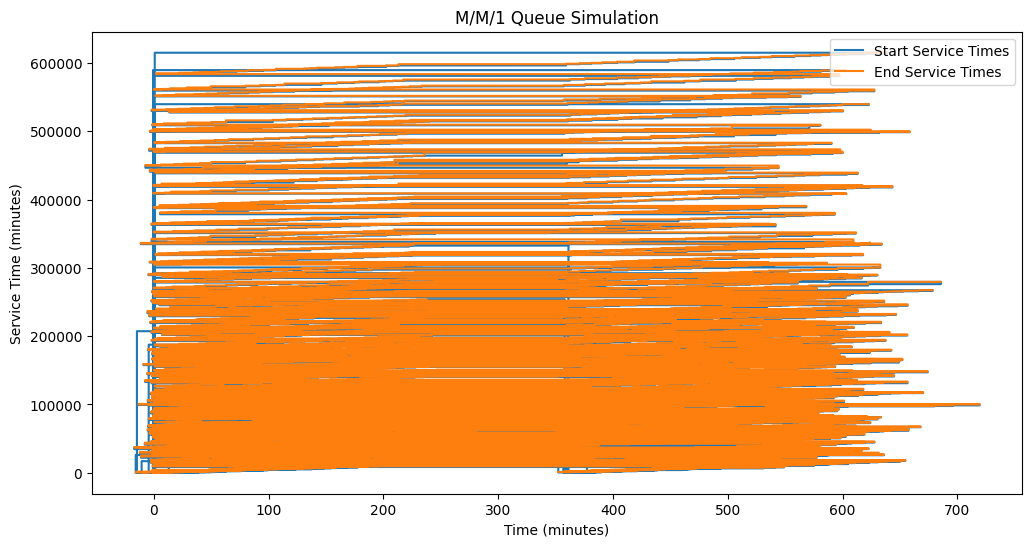

In [20]:
# Print average waiting time
print(f"Average waiting time: {np.mean(wait_times)} minutes")

# Plot the results
plt.figure(figsize=(12, 6))
plt.step(arrival_times, start_service_times, where='post', label='Start Service Times')
plt.step(arrival_times, end_service_times, where='post', label='End Service Times')
plt.legend()
plt.xlabel('Time (minutes)')
plt.ylabel('Service Time (minutes)')
plt.title('M/M/1 Queue Simulation')
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
# Load the data from a CSV file
df = pd.read_csv('Merged_ServiceTime.csv')

# Step 3: Prepare the Data

In [23]:
# Convert 'StartTime' to datetime object and 'ServTime' to minutes
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%H:%M:%S')
df['ServTime'] /= 60  # Convert service time from seconds to minutes for simplicity

# Calculate interarrival times in minutes
df['Interarrival'] = df['StartTime'].diff().dt.total_seconds() / 60
df['Interarrival'].iloc[0] = 0  # Set the first interarrival time to 0

/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_12978/4053323027.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Interarrival'].iloc[0] = 0  # Set the first interarrival time to 0
/var/folders/tf/6tszc4p95dn6fjrhhsz6w63800

# Step 4: Simulate the M/M/1 Queue

In [24]:
# Initialize variables
queue = []  # This will store the time when each customer will be done with the service
time_elapsed = 0
waiting_times = []

# Queue simulation
for index, row in df.iterrows():
    arrival_time = time_elapsed + row['Interarrival']
    if queue:
        # Remove all served customers from the queue
        queue = [q for q in queue if q > arrival_time]
    
    if queue:
        start_service_time = max(queue[-1], arrival_time)
    else:
        start_service_time = arrival_time
    
    finish_service_time = start_service_time + row['ServTime']
    queue.append(finish_service_time)
    waiting_time = start_service_time - arrival_time
    waiting_times.append(waiting_time)
    time_elapsed = arrival_time

# Step 5: Visualize the Waiting Time

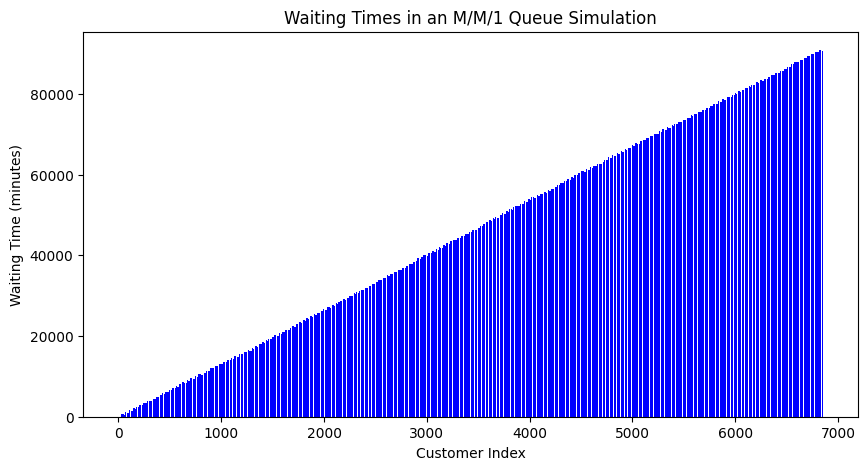

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(waiting_times)), waiting_times, color='blue')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time (minutes)')
plt.title('Waiting Times in an M/M/1 Queue Simulation')
plt.show()

# Improvement

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('Merged_ServiceTime.csv')
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%H:%M:%S')
df['ServTime'] /= 60  # Originally in seconds, now in minutes

# Applying a 20% reduction in service times
df['ServTime'] *= 0.8  # Adjust this factor based on the expected improvement

# Calculate interarrival times
df['Interarrival'] = df['StartTime'].diff().dt.total_seconds() / 60
df['Interarrival'].iloc[0] = 0



/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_12978/1096472352.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Interarrival'].iloc[0] = 0
/var/folders/tf/6tszc4p95dn6fjrhhsz6w6380000gn/T/ipykernel_12978/1096472352.py:14

In [33]:
# Initialize variables for simulation
queue = []
time_elapsed = 0
waiting_times = []

# Simulate the queue with improved service times
for index, row in df.iterrows():
    arrival_time = time_elapsed + row['Interarrival']
    queue = [q for q in queue if q > arrival_time]  # Clear served customers
    start_service_time = max(queue[-1], arrival_time) if queue else arrival_time
    finish_service_time = start_service_time + row['ServTime']
    queue.append(finish_service_time)
    waiting_time = start_service_time - arrival_time
    waiting_times.append(waiting_time)
    time_elapsed = arrival_time




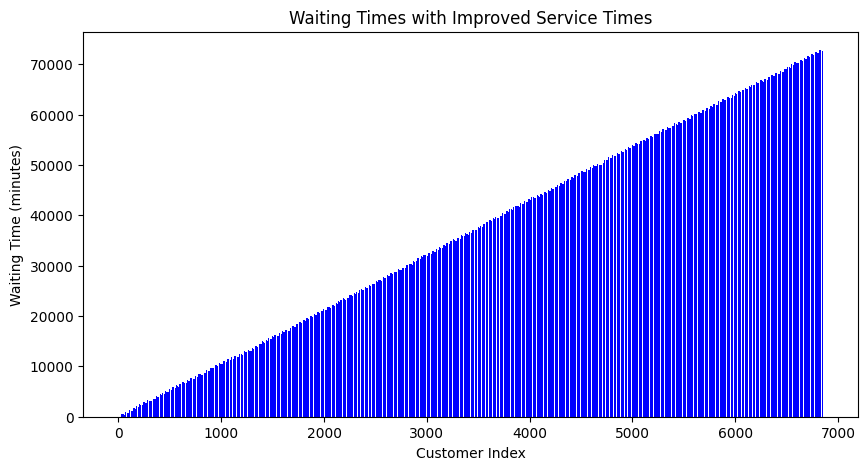

In [34]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.bar(range(len(waiting_times)), waiting_times, color='blue')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time (minutes)')
plt.title('Waiting Times with Improved Service Times')
plt.show()